# Winnining Wrestlers Entertainment

In this activity you will be taking four seperate csvs that were scraped down from a wrestling database, merging them together, and then creating charts to visualize a wrestler's wins and losses over the course of four years.

### Part 1 - Macho Merging

* You will likely need to perform three different merges over the course of this activity, changing the names of your columns as you go along.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
wwe13 = pd.read_csv('../Data/WWE-Data-2013.csv')
wwe14 = pd.read_csv('../Data/WWE-Data-2014.csv')
wwe15 = pd.read_csv('../Data/WWE-Data-2015.csv')
wwe16 = pd.read_csv('../Data/WWE-Data-2016.csv')


In [18]:
# Rename columns

years_df = zip([2013, 2014, 2015, 2016],
              [wwe13, wwe14, wwe15, wwe16])
for year, df in years_df:
    df.rename(columns = {"Wins": str(year) + " Wins",
                       "Losses": str(year) + " Losses",
                       "Draws": str(year) + " Draws"
                        }, inplace = True)

In [19]:
# Merge all dfs

from functools import reduce

allYears = reduce(lambda left, right: pd.merge(left, right,
                on = ["Wrestler"], how = "outer"),
                 [wwe13, wwe14, wwe15, wwe16])
allYears = allYears.fillna(0)
allYears.head()

,Wrestler,2013 Wins,2013 Losses,2013 Draws,2014 Wins,2014 Losses,2014 Draws,2015 Wins,2015 Losses,2015 Draws,2016 Wins,2016 Losses,2016 Draws
0,Daniel Bryan,177.0,37.0,6.0,35.0,16.0,2.0,51.0,7.0,0.0,0.0,0.0,0.0
1,Dean Ambrose,70.0,134.0,4.0,129.0,36.0,2.0,150.0,63.0,5.0,133.0,67.0,4.0
2,Antonio Cesaro,80.0,126.0,1.0,5.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Seth Rollins,50.0,150.0,4.0,87.0,105.0,4.0,51.0,124.0,1.0,39.0,75.0,4.0
4,Randy Orton,129.0,63.0,8.0,33.0,87.0,5.0,81.0,10.0,1.0,39.0,21.0,0.0


### Part 2 - Time to Calculate!

* When your tables have been merged together into one data frame, calculate the total number of wins, losses, and draws a wrestler has had over the course of their career. Also create a new column that will hold the total matches a wrestler has been in over the course of their career.

    * You will need to convert all NaN values to a number so that you can perform these calculations

* We are only interested in those wrestlers who have been with the WWE from 2013 to 2016. You will need to come up with some way of filtering out rows that do not meet these conditions.
    
    * Also set the 'Wrestler' column as your key for easier referencing later on.

In [20]:
wins = allYears[['Wrestler','2013 Wins','2014 Wins','2015 Wins','2016 Wins']].set_index("Wrestler")
losses = allYears[['Wrestler','2013 Losses','2014 Losses','2015 Losses', '2016 Losses']].set_index("Wrestler")
draw = allYears[['Wrestler','2013 Draws','2014 Draws','2015 Draws','2016 Draws']].set_index("Wrestler")

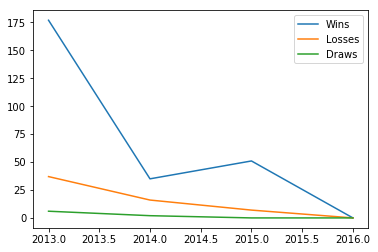

In [21]:
winPlot, = plt.plot([2013, 2014, 2015, 2016],
                    wins.loc["Daniel Bryan", ['2013 Wins','2014 Wins','2015 Wins','2016 Wins']],
                   label = "Wins")
lossPlot, = plt.plot([2013, 2014, 2015, 2016],
                    losses.loc["Daniel Bryan", ['2013 Losses','2014 Losses','2015 Losses', '2016 Losses']],
                    label = "Losses")
drawPlot, = plt.plot([2013, 2014, 2015, 2016],
                    draw.loc["Daniel Bryan", ['2013 Draws','2014 Draws','2015 Draws','2016 Draws']],
                    label = "Draws")
plt.legend()
plt.show()